In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade --user pip

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip -V

pip 21.1.2 from C:\Users\anoop\AppData\Roaming\Python\Python38\site-packages\pip (python 3.8)

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade --user tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import libraries
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import sequential
from keras.layers import Dense,Conv2D,Flatten
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report

# The Data

In [7]:
# Load the data and split it into train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing

In [8]:
# Get the image shape
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
# Take a look at the first image (at index=0) in the training data set
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
x_train[0].shape

(28, 28)

In [12]:
# print the image Label
y_train[0]

5

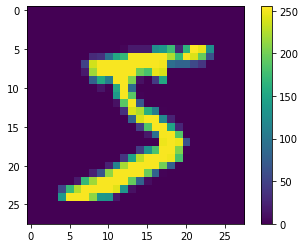

In [13]:
# show the image as a picture
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()

In [14]:
# Reshape the data to fit the model
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [15]:
x_train[0].shape

(28, 28, 1)

In [16]:
# To find the minimum value of x_train
np.min(x_train)

0

In [17]:
# To find the maximum value of x_train
np.max(x_train)

255

In [18]:
# Normalization
x_train=x_train/255
x_test=x_test/255

In [19]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# One hot encoding 
### Labels

In [20]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
y_train.shape

(60000,)

In [22]:
y_train[0]

5

In [23]:
# Conversion
y_cat_train=to_categorical(y_train)
y_cat_test=to_categorical(y_test)

In [24]:
print(y_cat_train.shape)

(60000, 10)


In [25]:
# Print the new label
print(y_cat_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Building The Model

In [26]:
# Build the CNN model
model = tf.keras.Sequential()

# Add model layers
model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.Flatten())

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(tf.keras.layers.Dense(10, activation='softmax'))



In [27]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
# Compilation
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [29]:
x_train.shape

(60000, 28, 28, 1)

In [30]:
y_cat_train.shape

(60000, 10)

In [31]:
# Fit the model
hist=model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 106s 56ms/step - loss: 0.1262 - accuracy: 0.9630 - val_loss: 0.0475 - val_accuracy: 0.9843
Epoch 2/3
1875/1875 [==============================] - 105s 56ms/step - loss: 0.0457 - accuracy: 0.9856 - val_loss: 0.0527 - val_accuracy: 0.9829
Epoch 3/3
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0301 - accuracy: 0.9904 - val_loss: 0.0485 - val_accuracy: 0.9851


In [32]:
# Model evaluation
test_loss,test_acc=model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0485 - accuracy: 0.9851


In [33]:
print(test_loss)

0.04849490523338318


In [34]:
print(test_acc)

0.9850999712944031


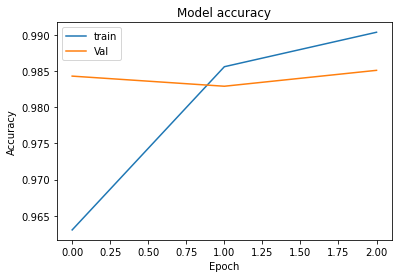

In [35]:
# Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','Val'],loc='upper left')
plt.show()

In [36]:
# Show predictions as the probabilities for the first 4 images in the test set
predictions=model.predict(x_test[:4])
predictions

array([[9.3887875e-13, 2.4542599e-11, 4.6971782e-09, 1.2029736e-07,
        2.2631953e-12, 5.1516770e-11, 1.6371241e-18, 9.9999988e-01,
        3.6361799e-11, 2.7439409e-08],
       [6.7904740e-09, 7.5004948e-07, 9.9999225e-01, 1.4518652e-10,
        3.6925870e-12, 5.9549484e-13, 7.0798328e-06, 1.4732630e-11,
        5.8490333e-09, 3.7539932e-12],
       [1.0640791e-08, 9.9985421e-01, 5.1655011e-06, 1.4607653e-08,
        5.9435646e-05, 9.0580306e-07, 4.4356193e-07, 7.7530080e-05,
        2.1057463e-06, 1.7911775e-08],
       [9.9989069e-01, 3.0177002e-12, 5.2678322e-05, 4.1507869e-10,
        1.7837321e-08, 1.9133694e-08, 5.5921868e-05, 1.5097479e-08,
        1.3083334e-08, 7.2115841e-07]], dtype=float32)

In [37]:
# Print our predictions as the number labels for the first 4 images
print(np.argmax(predictions,axis=1))
#Print the actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


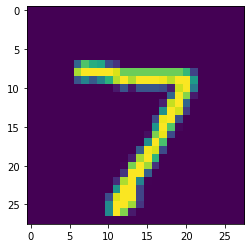

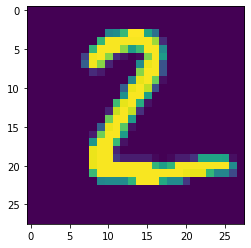

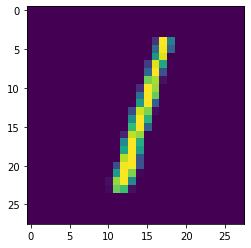

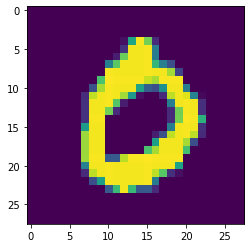

In [38]:
# Show the first 4 images as pictures
for i in range(0,4):
    image=x_test[i]
    image=np.array(image,dtype='float')
    pixels=image.reshape((28,28))
    plt.imshow(pixels)
    plt.show()

In [39]:
predictions=model.predict_classes(x_test)

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       1.00      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.99      0.99     10000

